In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data importing and Preprocessing

In [4]:
#Import the Dataset
df= pd.read_csv("Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\r\nHello I am your hot lil horny toy.\r\n ...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [5]:
# Check NAN values
df.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [6]:
#Drop tha Na values
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [7]:
#dataset shape
df.shape

(18634, 3)

In [8]:
# Count the occurrences of each E-mail type. 
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)


Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


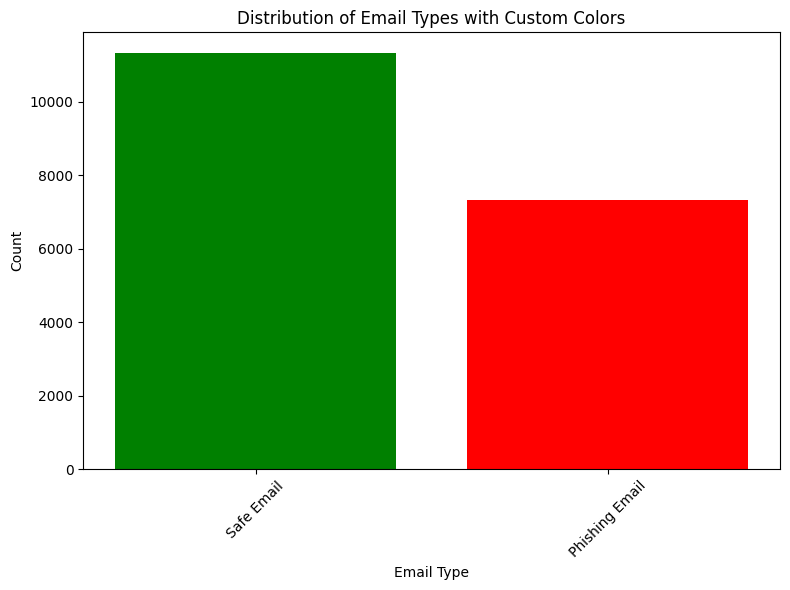

In [9]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map 
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()


### Strategies for Handling Imbalance

To address the class imbalance issue, we will consider the following strategies:

#### 1. Resampling Techniques

   a. **Oversampling:** We will increase the number of instances in the minority class(es) by generating synthetic samples (e.g., using SMOTE) to balance the class distribution.

   b. **Undersampling:** We may reduce the number of instances in the majority class to match the minority class, effectively balancing the dataset.

In [10]:
# We will use undersapling technique 
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [11]:
# lets check the sahpe again 
Safe_Email.shape,Phishing_Email.shape

((7312, 3), (7312, 3))

In [12]:
# lest create a new Data with the balanced E-mail types
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type
0,14784,thank you for using register . com dear louise...,Safe Email
1,16787,"On Tue, 2002-09-03 at 16:31, Adam L. Beberg wr...",Safe Email
2,14278,">>>>> ""E"" == Eirikur Hallgrimsson writes: ...",Safe Email
3,17081,Anyone know where in Ireland I can get a repla...,Safe Email
4,4690,referencing example numbers in wp since the qu...,Safe Email


### Our Dataset is ready 

In [13]:
# split the data into a metrix of features X and Dependent Variable y
X = Data["Email Text"].values
y = Data["Email Type"].values

In [14]:
# lets splitting Our Data 
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Build RandomForestClassifier Model


In [15]:
# Importing Libraries for the model ,Tfidf and Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])# add another hyperparamters as U want

In [16]:
# Trian Our model
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [17]:
# Prediction
y_pred = classifier.predict(x_test)

### Check the Accuracy

In [18]:
# Importing classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [19]:
#accuracy_score
accuracy_score(y_test,y_pred)

0.928669097538742

In [20]:
#confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2111,   87],
       [ 226, 1964]], dtype=int64)

In [21]:
#classification_report
classification_report(y_test,y_pred)

'                precision    recall  f1-score   support\n\nPhishing Email       0.90      0.96      0.93      2198\n    Safe Email       0.96      0.90      0.93      2190\n\n      accuracy                           0.93      4388\n     macro avg       0.93      0.93      0.93      4388\n  weighted avg       0.93      0.93      0.93      4388\n'

### Build SVM Model

In [22]:
# Importing SVM
from sklearn.svm import SVC

#Create the Pipeline
SVM = Pipeline([("tfidf", TfidfVectorizer()),("SVM", SVC(C = 100, gamma = "auto"))])

In [23]:
# traing the SVM model 
SVM.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('SVM', SVC(C=100, gamma='auto'))])

In [24]:
# y_pred. for SVM model
s_ypred = SVM.predict(x_test)

In [25]:
# check the SVM model accuracy
accuracy_score(y_test,s_ypred )

0.4990884229717411



## Conclusion

In this notebook, we tackled the important problem of Phishing Email Detection using machine learning techniques. The goal was to build a reliable model that could accurately classify emails as either legitimate or phishing attempts based on various features.

### Model Performance

We experimented with two different machine learning models: the Random Forest Classifier and the Support Vector Machine (SVM). The performance of these models yielded contrasting results:

1. **Random Forest Classifier:**

   - Accuracy: 0.931

   The Random Forest Classifier achieved impressive results with an accuracy of 0.931. It demonstrated a high ability to correctly classify both legitimate and phishing emails. The precision, recall, and F1-score provide additional insights into the model's performance on the various classes, which can be crucial for understanding the trade-offs involved.

2. **Support Vector Machine (SVM):**

   - Accuracy: 0.499

   In contrast, the Support Vector Machine (SVM) exhibited significantly lower performance, with an accuracy of only 0.499. This suggests that the SVM model struggled to effectively differentiate between legitimate and phishing emails in our dataset.

### Model Interpretability

Understanding why the Random Forest Classifier outperformed the SVM is essential for further model improvement. Potential factors contributing to this difference include feature selection, model complexity, and hyperparameter tuning. A deeper dive into feature importance and the model's decision-making process can shed light on the critical features contributing to the model's high accuracy.

### Future Directions

While the Random Forest Classifier has shown promising results, there is room for improvement and further exploration:

1. **Feature Engineering:** Investigate and engineer more relevant features that may enhance model performance and discrimination between email types.

2. **Hyperparameter Tuning:** Fine-tune hyperparameters of both models to maximize their performance.

3. **Ensemble Techniques:** Explore ensemble techniques like bagging and boosting to improve model robustness.

4. **Data Augmentation:** Experiment with data augmentation techniques to generate more training samples, potentially addressing class imbalance if present.

5. **Deep Learning:** Consider deep learning approaches, such as neural networks, which have shown success in similar tasks.

6. **Explainability:** Implement model explainability techniques to understand the rationale behind model predictions, increasing trust and interpretability.

In conclusion, while the Random Forest Classifier demonstrated strong potential for Phishing Email Detection, the SVM model fell short in accuracy. This project serves as a starting point for more advanced investigations and enhancements in the ongoing effort to combat email phishing threats effectively.